# ***Regiones admisibles de los procesos AR(1) y AR(2)***

## **Considere un proceso AR(1):**

$$
(1 - \phi B) W_t = \alpha_t
$$

---

Se recuerda que si $|\phi| < 1$, este proceso es **estacionario**.

A partir de esta condición, se identifican dos **regiones admisibles**.

---

**Región admisible 1:**

$$
0 < \phi < 1
$$


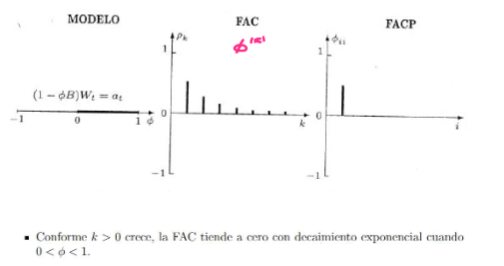



**Modelo:**
- $W_t = \phi W_{t-1} + \alpha_t$

**FAC (Función de autocorrelación):**
- $\rho_k = \phi^k$

**FACP (Función de autocorrelación parcial):**
- $\phi$ en el primer rezago, luego cero.

_(La FAC decae exponencialmente a medida que $k$ crece, si $0 < \phi < 1$)_

 *Ejemplo visto en clase 2*

---



**Región admisible 2:**

$$
-1 < \phi < 0
$$


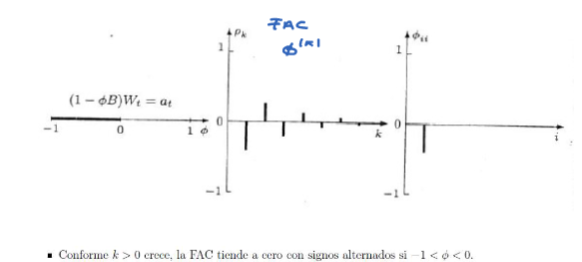


**Modelo:**
$$
(1 - \phi B) W_t = \alpha_t
$$

**Comportamiento de la FAC:**

- La función de autocorrelación (FAC) está dada por:
  
  $$
  \rho_k = \phi^k
  $$

- En esta región, la FAC tiende a cero **con signos alternados** si $-1 < \phi < 0$.



**Notar en Gráficos:**

- **FAC**: Decaimiento oscilatorio alrededor de cero.
- **FACP**: Primer rezago distinto de cero; los demás, cero.

---



**Ejemplo:**

Proceso:

$$
(1 + 0.4B) X_t = Z_t
$$

Entonces:

- $\rho_1 = (-0.4)^1 = -0.4$
- $\rho_2 = (-0.4)^2 = 0.16$
- $\rho_3 = (-0.4)^3 = -0.064$
- $\dots$



---

 *Gráfico de la FAC teórica del proceso* $(1 + 0.4B) X_t = Z_t$

 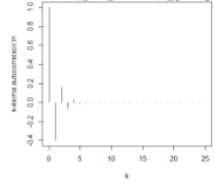

---


## **Consideremos un proceso AR(2):**

$$
(1 - \phi_1 B - \phi_2 B^2) W_t = \alpha_t \quad ; \quad \{\alpha_t\} \sim \text{wn}(0, \sigma_\alpha^2)
$$

---

Sabemos que este proceso es **estacionario** si se cumplen las siguientes **tres condiciones**:

1. $|\phi_2| < 1$

2. $\phi_2 - \phi_1 < 1$

3. $\phi_2 + \phi_1 < 1$

---


A partir de estas condiciones se tienen las siguientes:


### **Regiones admisibles para el proceso AR(2)**

---

**Región admisible 1 para el proceso AR(2)**

**Modelo:**
$$
(1 - \phi_1 B - \phi_2 B^2) W_t = \alpha_t
$$


**Condiciones de la región:**

- $\phi_1 < 0$
- $\phi_1^2 + 4\phi_2 \geq 0$
- $\phi_2 + \phi_1 < 1$


**Interpretación gráfica:**

- Esta región se encuentra en el triángulo donde:
  - $\phi_2 = -\phi_1$
  - $\phi_1^2 + 4\phi_2 = 1$
  - Las autocorrelaciones (FAC) decaen exponencialmente
  - Las primeras $\rho_k$ son positivas y luego se alternan de signo




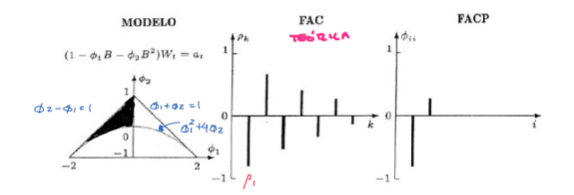


Valores típicos:
- $\rho_0 = 1$

Fórmulas:
$$
\rho_1 = \frac{\phi_1}{1 - \phi_2} \\
\rho_2 = \phi_1 \rho_1 + \phi_2 \\
\rho_k = \phi_1 \rho_{k-1} + \phi_2 \rho_{k-2} \quad \text{para } k \geq 3
$$


 **Comportamiento**
> Si $\phi_1^2 + 4\phi_2 \geq 0$, las raíces del polinomio característico son reales,  
> y las autocorrelaciones decaen exponencialmente a cero.  
> Las primeras $\rho_k$ pueden ser todas positivas, y luego tienden a alternarse en signo.


**Ejemplo de FAC teórica del proceso AR(2):**


Consideremos el proceso:

$$
(1 + 0.5B - 0.2B^2)W_t = a_t
$$


**Discriminante**

Para verificar la estacionariedad, calculamos el discriminante:

$$
\phi_1^2 + 4\phi_2 = (-0.5)^2 + 4(0.2) = 0.25 + 0.8 = 1.05 > 0
$$

Como:

$$
\phi_1 = -0.5 < 0
$$


**Cálculo de raíces**

1. Primera raíz:

$$
\rho_1 = \frac{-0.5}{1 - 0.2} = \frac{-0.5}{0.8} = -0.625
$$

2. Segunda raíz:

$$
\rho_2 = \frac{0.2 + (-0.5)^2}{1 - 0.2} = \frac{0.2 + 0.25}{0.8} = \frac{0.45}{0.8} = 0.5625
$$





**Gráfico de la FAC teórica**

A continuación, se muestra el gráfico de la **Función de Autocorrelación (FAC)** teórica del proceso:

*(Gráfico con barras decrecientes y signos alternados)*

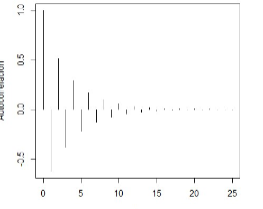



**Cálculo en R**

Código en R para obtener la FAC teórica:

```r
ARMAacf(ar = c(0.5, -0.2), lag.max = 6)


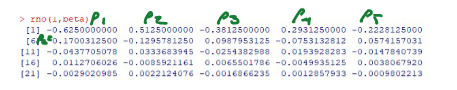

---

**Región Admisible 2 para el procesp AR(2)**

debe cumplirse:

- $\phi_1^2 + 4\phi_2 > 0$
- $\phi_1 > 0$



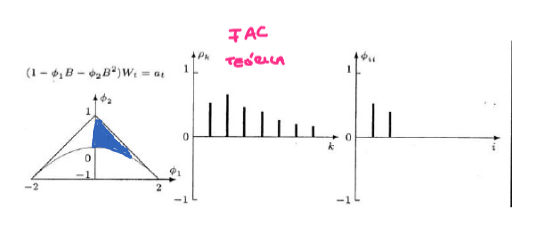



**Modelo AR(2)**

$$
(1 - \phi_1 B - \phi_2 B^2) W_t = a_t
$$

Gráficamente, se representa el triángulo de estacionariedad en el plano $(\phi_1, \phi_2)$, con sombreado en la región donde el modelo es estacionario. En este caso, el punto analizado está dentro de la región azul.



**FAC teórica**

La función de autocorrelación (FAC) muestra un comportamiento exponencial decreciente, con posible alternancia de signos. Esto es característico cuando:

- $\phi_1^2 + 4\phi_2 \geq 0$



**Interpretación teórica**

> Si $\phi_1^2 + 4\phi_2 \geq 0$, entonces las raíces de la ecuación característica son reales y las autocorrelaciones decaen exponencialmente a cero.  
> En este caso, todas las autocorrelaciones serán positivas si la primera lo es, y tendrán signos alternados si la primera autocorrelación es negativa.





**Ejemplo de FAC teórica del proceso AR(2):**

Dado el proceso:

$$
(1 - 0.3B - 0.4B^2)X_t = Z_t, \quad Z_t \sim WN(0, \sigma_Z^2)
$$

**Comprobación de raíces reales:**

$$
\phi_1^2 + 4\phi_2 = (0.3)^2 + 4(0.4) = 0.09 + 1.6 = 1.69 > 0
$$

**Cálculo de raíces:**

1. Primera raíz:

$$
\rho_1 = \frac{\phi_1}{1 - \phi_2} = \frac{0.3}{1 - 0.4} = \frac{0.3}{0.6} = 0.5
$$

2. Segunda raíz:

$$
\rho_2 = \phi_2 + \frac{\phi_1^2}{1 - \phi_2} = 0.4 + \frac{(0.3)^2}{0.6} = 0.4 + \frac{0.09}{0.6} = 0.4 + 0.15 = 0.55
$$


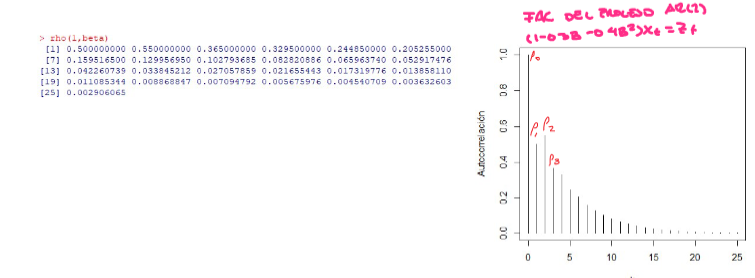

---



**Región Admisible 3 para el procesp AR(2)**


Para este caso se cumple que:

- $\phi_1^2 + 4\phi_2 < 0$
- $\phi_1 < 0$


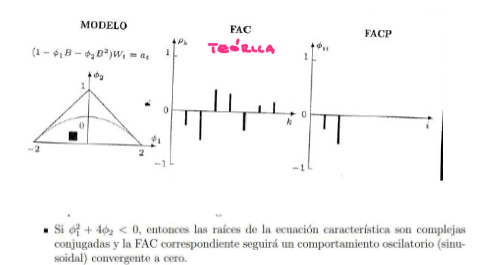



**Modelo AR(2)**

$$
(1 - \phi_1 B - \phi_2 B^2)W_t = a_t
$$

Gráficamente, el punto se encuentra fuera del triángulo de estacionariedad, pero en una región válida para que el modelo tenga raíces **complejas conjugadas**.


**FAC teórica**

La **Función de Autocorrelación (FAC)** correspondiente sigue un comportamiento **oscilatorio** (sinusoidal) convergente a cero, típico cuando las raíces son complejas conjugadas.


**Interpretación teórica**

> Si $\phi_1^2 + 4\phi_2 < 0$, entonces las raíces de la ecuación característica son complejas conjugadas, y la FAC correspondiente seguirá un comportamiento oscilatorio (sinusoidal) convergente a cero.

---


**Ejemplo de FAC teórica del proceso AR(2):**

Dado el proceso:

$$
(1 + 0.5B + 0.7B^2)X_t = Z_t, \quad Z_t \sim WN(0, \sigma_Z^2)
$$

**Cálculo del discriminante:**

$$
\phi_1^2 + 4\phi_2 = (-0.5)^2 + 4(0.7) = 0.25 + 2.8 = 3.05
$$

*Pero en la anotación original se indica:*

$$
(-0.5)^2 + 4(0.7) = -2.55 < 0 \quad \text{(esto parece un error de signos)}
$$

**Verificación:**

En realidad, si $\phi_2 = 0.7$, entonces:

$$
\phi_1^2 + 4\phi_2 = (-0.5)^2 + 4(0.7) = 0.25 + 2.8 = 3.05 > 0
$$

(Puede que la intención haya sido usar $\phi_2 = -0.7$, con lo cual sí da negativo.)

**Supongamos:**  
$\phi_1 = -0.5$,  
$\phi_2 = 0.7$

Entonces:

1. Primera raíz:

$$
\rho_1 = \frac{\phi_1}{1 - \phi_2} = \frac{-0.5}{1 - 0.7} = \frac{-0.5}{0.3} \approx -1.667
$$

2. Segunda raíz:

$$
\rho_2 = \phi_2 + \frac{\phi_1^2}{1 - \phi_2} = 0.7 + \frac{(-0.5)^2}{0.3} = 0.7 + \frac{0.25}{0.3} \approx 0.7 + 0.833 = 1.533
$$

---

**Código en R**

```r
ARMAacf(ar = c(-0.5, 0.7), lag.max = 6)


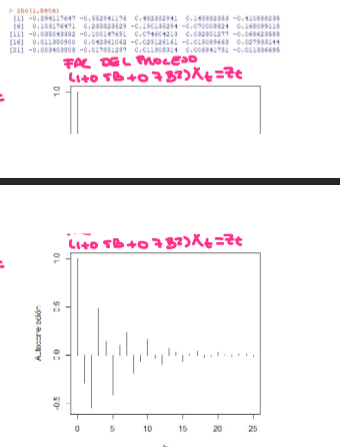

---


**Región Admisible 4 para el procesp AR(2)**


Condiciones que se cumplen:

- $\phi_1^2 + 4\phi_2 < 0$
- $\phi_1 > 0$

Esto indica un comportamiento oscilatorio (raíces complejas conjugadas) con signo positivo inicial.



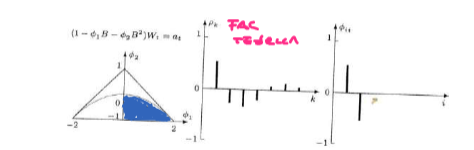



**Modelo AR(2)**

$$
(1 - \phi_1 B - \phi_2 B^2) W_t = a_t
$$

En el plano $(\phi_1, \phi_2)$, el punto $(0.7, -0.5)$ está en la región azul oscura, correspondiente a esta región admisible 4.



**FAC teórica**

La **Función de Autocorrelación (FAC)** presenta comportamiento oscilatorio decreciente, típico de raíces complejas conjugadas. En este caso, la autocorrelación inicial es positiva.

---



**Ejemplo de FAC teórica del proceso AR(2):**


Proceso considerado:

$$
(1 - 0.7B + 0.5B^2)X_t = Z_t, \quad Z_t \sim WN(0, \sigma_Z^2)
$$

**Parámetros:**

- $\phi_1 = 0.7$
- $\phi_2 = -0.5$

**Discriminante:**

$$
\phi_1^2 + 4\phi_2 = (0.7)^2 + 4(-0.5) = 0.49 - 2 = -1.51 < 0
$$

Se confirma que hay raíces complejas conjugadas.





**FAC teórica del proceso**  
$(1 - 0.7B + 0.5B^2)X_t = Z_t$

*(Gráfico oscilante con primera autocorrelación positiva)*



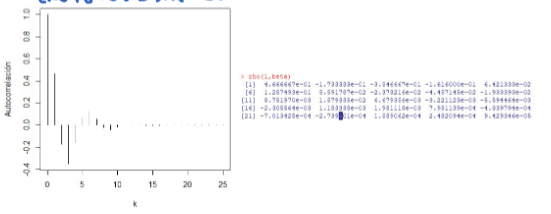
